In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
store = pd.read_csv("store.csv")
al = pd.read_csv("al.csv")
food = pd.read_csv("food.csv")
a = pd.read_csv("을지로.csv")

In [4]:
a.rename(columns = {'rllt_details3':'time'}, inplace = True)

In [5]:
a

,Title,Image,rllt_details,yi40hd,rdapee,rllt_details1,rllt_details2,time
0,을지로술집,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.4\n(33) · ₩20,000~30,000 · 술집",4.4,(33),"₩20,000~30,000",저동2가 마른내로 18,"금: 오전 11:30–오후 2:00, 오후 6:00–오전 12:00"
1,십분의 일,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.2\n(195) · ₩10,000~20,000 · 술집",4.2,(195),"₩10,000~20,000",수표로 42-9 2 층,금: 오후 6:00–오전 12:00
2,을지루이스,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.7\n(153) · ₩10,000~20,000 · 술집",4.7,(153),"₩10,000~20,000",수표로 20,금: 오후 12:00–오후 11:00
3,아트몬스터 을지로점,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.3\n(133) · ₩10,000~20,000 · 술집",4.3,(133),"₩10,000~20,000",을지로3가 349-1,금: 오후 5:00–오전 1:00
4,을지로딜런(Euljirodylan),"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","5.0\n(62) · ₩20,000~30,000 · 술집",5.0,(62),"₩20,000~30,000",인현동2가 192-17,금: 오후 6:00–오전 3:00
...,...,...,...,...,...,...,...,...
193,RM CAFE & WINE CLUB,https://www.google.co.kr/maps/vt/data=oBQRwlqD...,리뷰 없음 · 술집,NaN,NaN,NaN,을지로 177,영업시간 알 수 없음
194,그레이문,https://www.google.co.kr/maps/vt/data=jTWoZQeK...,리뷰 없음 · 술집,NaN,NaN,NaN,번지 A 동 KR 서울특별시 중구 주교동 19-1 방산시장 1층 198호,영업시간 알 수 없음
195,소피아엔무겐,https://www.google.co.kr/maps/vt/data=UKQbzU-N...,리뷰 없음 · 술집,NaN,NaN,NaN,을지로5가 133-1번지 중구 서울특별시 KR,영업시간 알 수 없음
196,그린호프,https://www.google.co.kr/maps/vt/data=LKjVD0Nt...,리뷰 없음 · 호프/생맥주집,NaN,NaN,NaN,을지로5가 72-1번지 지하1층 중구 서울특별시 KR,영업시간 알 수 없음


In [ ]:
import pandas as pd
from datetime import datetime

# ...existing code...

def convert_to_24h(time_str):
    try:
        return datetime.strptime(time_str, '%p %I:%M').strftime('%H:%M')
    except ValueError:
        return time_str

def process_time_column(df):
    df['time'] = df['time'].apply(lambda x: ', '.join([convert_to_24h(t.split(' ')[1]) if '오전' in t or '오후' in t else t for t in x.split(', ')]))
    return df

# Example usage
df = pd.read_csv('your_file.csv')
df = process_time_column(df)

# ...existing code...

In [6]:
store['영업시간_타임라인'] = store['영업시간'].str.extract(r'(\d{2}:\d{2}~\d{2}:\d{2})')
a['영업시간_타임라인'] = a['time'].str.extract(r'(\d{2}:\d{2}~\d{2}:\d{2})')

In [7]:
store['영업시간_타임라인'] = store['영업시간'].str.replace(r'[^0-9:~]', '', regex=True)
a['영업시간_타임라인'] = a['time'].str.replace(r'[^0-9:~]', '', regex=True)

In [8]:
a['마지막_영업시간'] = a['영업시간_타임라인'].str.slice(-5)


In [9]:
import datetime

In [20]:
from datetime import datetime
# '영업시간_타임라인' 열에서 마지막 5글자 추출
a['마지막_영업시간'] = a['영업시간_타임라인'].str.slice(-5)

# 오전/오후 정보를 포함하여 24시간 형식으로 변환하는 함수
def convert_to_24_hour(time_str):
    try:
        if '오전' in time_str:
            time_obj = datetime.strptime(time_str.replace('오전', '').strip(), '%I:%M')
            if time_obj.hour == 12:
                time_obj = time_obj.replace(hour=0)
        elif '오후' in time_str:
            time_obj = datetime.strptime(time_str.replace('오후', '').strip(), '%I:%M')
            if time_obj.hour != 12:
                time_obj = time_obj.replace(hour=(time_obj.hour + 12) % 24)
        else:
            time_obj = datetime.strptime(time_str.strip(), '%H:%M')
        return time_obj.strftime('%H:%M')
    except ValueError:
        return time_str

# '마지막_영업시간' 열을 오전/오후 정보를 포함하여 24시간 형식으로 변환
a['마지막_영업시간_24'] = a['마지막_영업시간'].apply(convert_to_24_hour)



# 결과 확인
print(a[['Title', '영업시간_타임라인', '마지막_영업시간', '마지막_영업시간_24']])

                   Title            영업시간_타임라인 마지막_영업시간 마지막_영업시간_24
0                  을지로술집  :11:302:006:0012:00    12:00       12:00
1                  십분의 일           :6:0012:00    12:00       12:00
2                  을지루이스          :12:0011:00    11:00       11:00
3             아트몬스터 을지로점            :5:001:00    01:00       01:00
4    을지로딜런(Euljirodylan)            :6:003:00    03:00       03:00
..                   ...                  ...      ...         ...
193  RM CAFE & WINE CLUB                                          
194                 그레이문                                          
195               소피아엔무겐                                          
196                 그린호프                                          
197                따봉노래터                                          

[198 rows x 4 columns]


In [23]:
a.head(20)

,Title,Image,rllt_details,yi40hd,rdapee,rllt_details1,rllt_details2,time,영업시간_타임라인,마지막_영업시간,마지막_영업시간_24
0,을지로술집,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.4\n(33) · ₩20,000~30,000 · 술집",4.4,(33),"₩20,000~30,000",저동2가 마른내로 18,"금: 오전 11:30–오후 2:00, 오후 6:00–오전 12:00",:11:302:006:0012:00,12:00,12:00
1,십분의 일,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.2\n(195) · ₩10,000~20,000 · 술집",4.2,(195),"₩10,000~20,000",수표로 42-9 2 층,금: 오후 6:00–오전 12:00,:6:0012:00,12:00,12:00
2,을지루이스,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.7\n(153) · ₩10,000~20,000 · 술집",4.7,(153),"₩10,000~20,000",수표로 20,금: 오후 12:00–오후 11:00,:12:0011:00,11:00,11:00
3,아트몬스터 을지로점,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.3\n(133) · ₩10,000~20,000 · 술집",4.3,(133),"₩10,000~20,000",을지로3가 349-1,금: 오후 5:00–오전 1:00,:5:001:00,01:00,01:00
4,을지로딜런(Euljirodylan),"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","5.0\n(62) · ₩20,000~30,000 · 술집",5.0,(62),"₩20,000~30,000",인현동2가 192-17,금: 오후 6:00–오전 3:00,:6:003:00,03:00,03:00
5,초원호프,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",4.2\n(89) · ₩₩ · 술집,4.2,(89),₩₩,을지로13길 18,금: 오후 12:00–오전 12:00,:12:0012:00,12:00,12:00
6,을지로삼발이,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",4.6\n(29) · 술집,4.6,(29),NaN,을지로20길 32-7 1층,금: 오후 5:30–오전 3:00,:5:303:00,03:00,03:00
7,루엘 드 샹들리에,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.6\n(54) · ₩1~10,000 · 카페",4.6,(54),"₩1~10,000",충무로5길 28,금: 오전 11:00–오후 11:00,:11:0011:00,11:00,11:00
8,취향로3가,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",4.1\n(116) · 술집,4.1,(116),NaN,충무로5길 21 금수레건물 2층 2층,금: 오후 5:00–오전 12:00,:5:0012:00,12:00,12:00
9,금샤빠 (금토일 샴페인빠),"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",4.8\n(180) · 술집,4.8,(180),NaN,을지로동 충무로 43-2,금: 오후 5:00–오전 1:00,:5:001:00,01:00,01:00


In [21]:
store['영업시간_타임라인'] = store['영업시간'].str.replace(r'[^0-9:~]', '', regex=True)

key = store[ ['Field1', '위치', '영업시간', '휴무일','영업시간_타임라인']]

key


,Field1,위치,영업시간,휴무일,영업시간_타임라인
0,경아패션,G동 1F 201-A호,평일 22:30~익일 17:00,"일요일, 설날, 추석, 여름 휴가일",22:30~17:00
1,고루방,G동 1F 325호,평일 22:30~익일 17:00,"일요일, 설날, 추석, 여름 휴가일",22:30~17:00
2,골든아워,G동 1F 227호,평일 22:30~익일 17:00,"일요일, 설날, 추석, 여름 휴가일",22:30~17:00
3,규리,G동 1F 225호,평일 22:30~익일 17:00,"일요일, 설날, 추석, 여름 휴가일",22:30~17:00
4,글로리아,G동 1F 301호,평일 22:30~익일 17:00,"일요일, 설날, 추석, 여름 휴가일",22:30~17:00
...,...,...,...,...,...
532,태경사,C동 2F 113호,평일 & 토요일 08:30~18:30,매주 일요일,08:30~18:30
533,한국공예,D동 1F,07:00~22:00,ㅡ,07:00~22:00
534,멋쟁이시계(멋진시계),D동 1F,07:00~22:00,-,07:00~22:00
535,캐릭터하우스,D동 2F,평일 & 토요일 06:00~17:00,매주 일요일,06:00~17:00


In [12]:
key['일요일_휴무'] = key['휴무일'].fillna('').apply(lambda x: 1 if '일요일' in x else 0)
key['영업시간_타임라인'] = key['영업시간_타임라인'].str.split('~').str[-1]
def convert_to_decimal_time(time_str):
    try:
        time_obj = pd.to_datetime(time_str, format='%H:%M', errors='coerce')
        if pd.isnull(time_obj):
            return None  # 변환 불가한 값을 None으로 처리
        return time_obj.hour + time_obj.minute / 60
    except Exception as e:
        return None  # 기타 오류도 None으로 처리

# '영업시간_타임라인'을 10진수 시간으로 변환
key['영업시간_타임라인_시간대'] = key['영업시간_타임라인'].apply(convert_to_decimal_time)


C:\Users\ansck\AppData\Local\Temp\ipykernel_36664\2749699792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key['일요일_휴무'] = key['휴무일'].fillna('').apply(lambda x: 1 if '일요일' in x else 0)
C:\Users\ansck\AppData\Local\Temp\ipykernel_36664\2749699792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key['영업시간_타임라인'] = key['영업시간_타임라인'].str.split('~').str[-1]
C:\Users\ansck\AppData\Local\Temp\ipykernel_36664\2749699792.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [13]:
key.isnull().sum().

SyntaxError: invalid syntax (1417278249.py, line 1)

In [14]:
key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Field1         535 non-null    object 
 1   위치             527 non-null    object 
 2   영업시간           535 non-null    object 
 3   휴무일            521 non-null    object 
 4   영업시간_타임라인      535 non-null    object 
 5   일요일_휴무         537 non-null    int64  
 6   영업시간_타임라인_시간대  532 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 29.5+ KB


In [15]:
key.dropna(subset = ['영업시간_타임라인_시간대'], inplace=True)

C:\Users\ansck\AppData\Local\Temp\ipykernel_36664\2893754214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key.dropna(subset = ['영업시간_타임라인_시간대'], inplace=True)


In [19]:
a.head(20)

,Title,Image,rllt_details,yi40hd,rdapee,rllt_details1,rllt_details2,time,영업시간_타임라인,마지막_영업시간,마지막_영업시간_24
0,을지로술집,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.4\n(33) · ₩20,000~30,000 · 술집",4.4,(33),"₩20,000~30,000",저동2가 마른내로 18,"금: 오전 11:30–오후 2:00, 오후 6:00–오전 12:00",:11:302:006:0012:00,12:00,12:00
1,십분의 일,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.2\n(195) · ₩10,000~20,000 · 술집",4.2,(195),"₩10,000~20,000",수표로 42-9 2 층,금: 오후 6:00–오전 12:00,:6:0012:00,12:00,12:00
2,을지루이스,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.7\n(153) · ₩10,000~20,000 · 술집",4.7,(153),"₩10,000~20,000",수표로 20,금: 오후 12:00–오후 11:00,:12:0011:00,11:00,11:00
3,아트몬스터 을지로점,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.3\n(133) · ₩10,000~20,000 · 술집",4.3,(133),"₩10,000~20,000",을지로3가 349-1,금: 오후 5:00–오전 1:00,:5:001:00,01:00,01:00
4,을지로딜런(Euljirodylan),"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","5.0\n(62) · ₩20,000~30,000 · 술집",5.0,(62),"₩20,000~30,000",인현동2가 192-17,금: 오후 6:00–오전 3:00,:6:003:00,03:00,03:00
5,초원호프,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",4.2\n(89) · ₩₩ · 술집,4.2,(89),₩₩,을지로13길 18,금: 오후 12:00–오전 12:00,:12:0012:00,12:00,12:00
6,을지로삼발이,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",4.6\n(29) · 술집,4.6,(29),NaN,을지로20길 32-7 1층,금: 오후 5:30–오전 3:00,:5:303:00,03:00,03:00
7,루엘 드 샹들리에,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.6\n(54) · ₩1~10,000 · 카페",4.6,(54),"₩1~10,000",충무로5길 28,금: 오전 11:00–오후 11:00,:11:0011:00,11:00,11:00
8,취향로3가,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",4.1\n(116) · 술집,4.1,(116),NaN,충무로5길 21 금수레건물 2층 2층,금: 오후 5:00–오전 12:00,:5:0012:00,12:00,12:00
9,금샤빠 (금토일 샴페인빠),"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",4.8\n(180) · 술집,4.8,(180),NaN,을지로동 충무로 43-2,금: 오후 5:00–오전 1:00,:5:001:00,01:00,01:00


In [16]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
sns.set(style="whitegrid")
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정 (예시)
plt.rcParams['font.family'] = 'HYGothic-Medium'


버전:  3.8.4
설치 위치:  c:\Users\ansck\anaconda3\Lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\ansck\.matplotlib
캐시 위치:  C:\Users\ansck\.matplotlib
설정파일 위치:  c:\Users\ansck\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc
411


<Axes: title={'center': '영업시간_타임라인_시간대'}, ylabel='Frequency'>

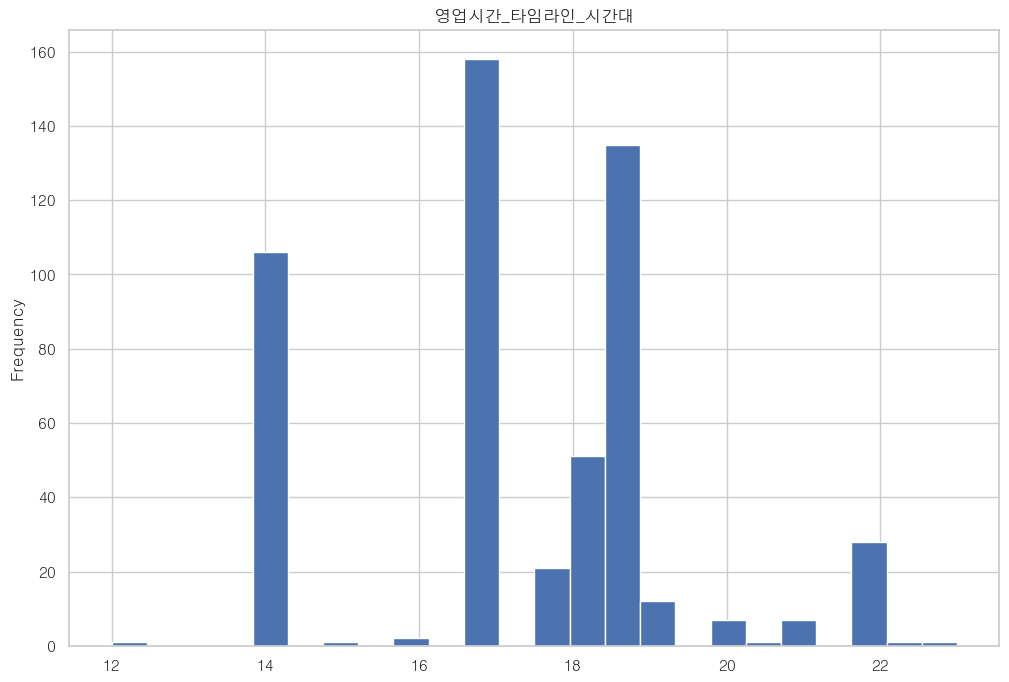

In [17]:
key['영업시간_타임라인_시간대'].astype(float).plot(kind='hist', bins=24, grid=True, figsize=(12, 8), title='영업시간_타임라인_시간대')

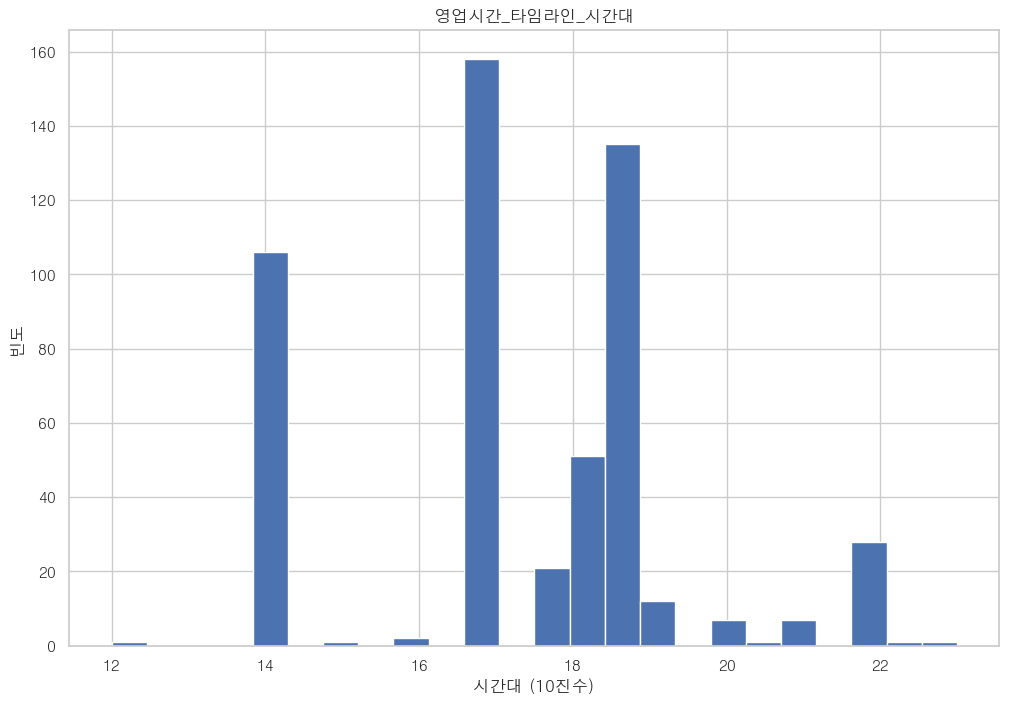

요약 통계:
 count    532.000000
mean      17.310150
std        2.079097
min       12.000000
25%       17.000000
50%       17.000000
75%       18.500000
max       23.000000
Name: 영업시간_타임라인_시간대, dtype: float64

빈도수 및 퍼센트:
                빈도수        퍼센트
영업시간_타임라인_시간대                
17.0           158  29.699248
18.5           135  25.375940
14.0           106  19.924812
18.0            51   9.586466
22.0            28   5.263158
17.5            21   3.947368
19.0            12   2.255639
21.0             7   1.315789
20.0             7   1.315789
16.0             2   0.375940
23.0             1   0.187970
20.5             1   0.187970
12.0             1   0.187970
22.5             1   0.187970
15.0             1   0.187970


In [83]:

# 1. 요약 통계 계산
summary_stats = key['영업시간_타임라인_시간대'].describe()

# 2. 빈도수와 퍼센트 계산
value_counts = key['영업시간_타임라인_시간대'].value_counts(dropna=False)
percentages = (value_counts / len(key)) * 100

# 3. 빈도수와 퍼센트 요약표 생성
summary_table = pd.DataFrame({
    '빈도수': value_counts,
    '퍼센트': percentages
})

# 4. 히스토그램 시각화
key['영업시간_타임라인_시간대'].astype(float).plot(
    kind='hist', 
    bins=24, 
    grid=True, 
    figsize=(12, 8), 
    title='영업시간_타임라인_시간대'
)

# 히스토그램 표시
plt.xlabel('시간대 (10진수)')
plt.ylabel('빈도')
plt.show()

# 결과 출력
print("요약 통계:\n", summary_stats)
print("\n빈도수 및 퍼센트:\n", summary_table)

In [88]:
food.rename(columns = {'rllt_details3': 'time'}, inplace = True)

In [91]:
food['영업시간_타임라인'] = food['time'].str.extract(r'(\d{1,2}:\d{2}[–~]\d{1,2}:\d{2})')


In [ ]:
# 목적별 예측을 위한 데이터 전처리 및 시계열 모델 적용 함수 정의
def forecast_time_series(data, model_type='ARIMA', periods=30):
    """
    data: 예측할 단일 시계열 데이터
    model_type: 'ARIMA' 또는 'MachineLearning' 중 선택
    periods: 예측 기간 (일 단위)
    """
    if model_type == 'ARIMA':
        # ARIMA 모델 학습 및 예측
        model = ARIMA(data, order=(5, 1, 0))
        model_fit = model.fit(disp=False)
        forecast = model_fit.get_forecast(steps=periods)
        forecast_df = forecast.summary_frame()
        forecast_df = forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']]
        forecast_df.columns = ['yhat', 'yhat_lower', 'yhat_upper']
        return forecast_df

    elif model_type == 'MachineLearning':
        # 머신러닝 기법을 사용한 예측 (예: RandomForest)
        from sklearn.ensemble import RandomForestRegressor
        model = RandomForestRegressor(n_estimators=100)
        X = np.arange(len(data)).reshape(-1, 1)
        y = data.values
        model.fit(X, y)
        X_future = np.arange(len(data), len(data) + periods).reshape(-1, 1)
        yhat = model.predict(X_future)
        forecast_df = pd.DataFrame({'yhat': yhat})
        return forecast_df

# 예측 결과 저장 및 시각화
purpose_forecasts = {}
for purpose in grouped_df.columns:
    print(f"Forecasting for purpose: {purpose}")
    time_series_data = grouped_df[purpose].resample('D').sum()  # 일 단위로 재샘플링
    time_series_data = time_series_data.fillna(0)
    
    # 모델 선택: ARIMA or MachineLearning
    forecast = forecast_time_series(time_series_data, model_type='ARIMA', periods=30)
    purpose_forecasts[purpose] = forecast
    
    # 예측 결과 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(time_series_data.index, time_series_data, label='Actual Data')
    plt.plot(forecast.index, forecast['yhat'], label='Forecast')
    plt.fill_between(forecast.index, forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
    plt.title(f'Forecast for Purpose: {purpose}')
    plt.xlabel('Date')
    plt.ylabel('Visitor Count')
    plt.legend()
    plt.show()


In [101]:
food['t'] = food['time'].str.replace(r'[^0-9:]', '', regex=True).str.extract(r'(\d{1,2}:\d{2})')


In [109]:
food['t'] = food['time'].str.split('–').str[-1]  # 마지막 시간 부분만 추출

# 숫자와 ':'만 남기고 불필요한 문자 제거
food['t'] = food['t'].str.replace(r'[^0-9:]', '', regex=True)

In [ ]:
food['t'] = food['t'].str.replace(r'[^0-9:]', '', regex=True)

In [180]:

# 2. 닫는 시간을 24시간제의 10진수 시간으로 변환
def convert_to_decimal_time(time_str):
    try:
        time_obj = pd.to_datetime(time_str, format='%H:%M', errors='coerce')
        if pd.isnull(time_obj):
            return None
        return time_obj.hour + time_obj.minute / 60 + 12
    except Exception as e:
        return None
    
    
food['T'] = food['t'].apply(convert_to_decimal_time)
# 3. 요약 통계 계산
summary_stats = food['닫는시간_10진수'].describe()

# 4. 시각화 (KDE + 히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(food['닫는시간_10진수'], bins=10, kde=True, color='orange')
plt.title('남대문시장 음식점 닫는 시간 분포')
plt.xlabel('닫는 시간 (시간 단위)')
plt.ylabel('빈도')
plt.grid(True)
plt.show()

# 결과 출력
print("남대문시장 음식점 닫는 시간 요약 통계:\n", summary_stats)

KeyError: 't'

In [183]:

a['TT'] = a['마지막_영업시간'].apply(convert_to_decimal_time)

In [184]:
a

,Title,Image,rllt_details,yi40hd,rdapee,rllt_details1,rllt_details2,time,영업시간_타임라인,마지막_영업시간,T,TT
0,을지로술집,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.4\n(33) · ₩20,000~30,000 · 술집",4.4,(33),"₩20,000~30,000",저동2가 마른내로 18,"금: 오전 11:30–오후 2:00, 오후 6:00–오전 12:00",:11:302:006:0012:00,12:00,24.0,24.0
1,십분의 일,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.2\n(195) · ₩10,000~20,000 · 술집",4.2,(195),"₩10,000~20,000",수표로 42-9 2 층,금: 오후 6:00–오전 12:00,:6:0012:00,12:00,24.0,24.0
2,을지루이스,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.7\n(153) · ₩10,000~20,000 · 술집",4.7,(153),"₩10,000~20,000",수표로 20,금: 오후 12:00–오후 11:00,:12:0011:00,11:00,23.0,23.0
3,아트몬스터 을지로점,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.3\n(133) · ₩10,000~20,000 · 술집",4.3,(133),"₩10,000~20,000",을지로3가 349-1,금: 오후 5:00–오전 1:00,:5:001:00,01:00,13.0,13.0
4,을지로딜런(Euljirodylan),"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","5.0\n(62) · ₩20,000~30,000 · 술집",5.0,(62),"₩20,000~30,000",인현동2가 192-17,금: 오후 6:00–오전 3:00,:6:003:00,03:00,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
193,RM CAFE & WINE CLUB,https://www.google.co.kr/maps/vt/data=oBQRwlqD...,리뷰 없음 · 술집,NaN,NaN,NaN,을지로 177,영업시간 알 수 없음,,,NaN,NaN
194,그레이문,https://www.google.co.kr/maps/vt/data=jTWoZQeK...,리뷰 없음 · 술집,NaN,NaN,NaN,번지 A 동 KR 서울특별시 중구 주교동 19-1 방산시장 1층 198호,영업시간 알 수 없음,,,NaN,NaN
195,소피아엔무겐,https://www.google.co.kr/maps/vt/data=UKQbzU-N...,리뷰 없음 · 술집,NaN,NaN,NaN,을지로5가 133-1번지 중구 서울특별시 KR,영업시간 알 수 없음,,,NaN,NaN
196,그린호프,https://www.google.co.kr/maps/vt/data=LKjVD0Nt...,리뷰 없음 · 호프/생맥주집,NaN,NaN,NaN,을지로5가 72-1번지 지하1층 중구 서울특별시 KR,영업시간 알 수 없음,,,NaN,NaN


In [132]:
time_counts = food['T'].value_counts(normalize=True).sort_index() * 100

# 결과를 데이터프레임으로 변환
time_percentage_df = time_counts.reset_index()
time_percentage_df.columns = ['시간대', '비율(%)']

# 결과 확인
pd.DataFrame(time_percentage_df)

,시간대,비율(%)
0,13.0,0.591716
1,14.0,1.183432
2,17.0,1.775148
3,18.0,1.775148
4,18.5,1.183432
5,19.0,5.917160
6,19.5,2.366864
7,20.0,9.467456
8,20.5,5.325444
9,21.0,33.727811


In [185]:
time_counts = a['TT'].value_counts(normalize=True).sort_index() * 100

# 결과를 데이터프레임으로 변환
time_percentage_df = time_counts.reset_index()
time_percentage_df.columns = ['시간대', '비율(%)']

# 결과 확인
pd.DataFrame(time_percentage_df)

,시간대,비율(%)
0,13.000000,14.482759
1,13.500000,0.689655
2,14.000000,15.862069
3,15.000000,2.758621
4,15.500000,0.689655
5,16.000000,1.379310
6,17.000000,2.068966
7,18.000000,0.689655
8,21.000000,0.689655
9,21.500000,0.689655


In [149]:
al.rllt_details3

0      금: 오전 9:00–오후 10:00
1       금: 오전 8:00–오후 8:00
2      금: 오전 10:00–오후 7:00
3       금: 오전 8:00–오후 9:00
4       금: 오후 4:00–오전 1:00
              ...         
187            영업시간 알 수 없음
188            영업시간 알 수 없음
189            영업시간 알 수 없음
190            영업시간 알 수 없음
191            영업시간 알 수 없음
Name: rllt_details3, Length: 192, dtype: object

In [159]:
al.dropna(subset = ['rllt_details3'], inplace=True)

In [160]:
al['t'] = al['rllt_details3'].str.split('–').str[-1]  # 마지막 시간 부분만 추출

# 2. 숫자와 ':'만 남기고 불필요한 문자 제거
al['t'] = al['t'].str.replace(r'[^0-9:]', '', regex=True)

# 3. '오전', '오후' 정보 추출
al['period'] = al['rllt_details3'].str.extract(r'(오전|오후)')

# 4. 닫는 시간을 24시간제의 10진수 시간으로 변환하는 함수
def convert_to_decimal_time(time_str, period):
    try:
        time_obj = pd.to_datetime(time_str, format='%H:%M', errors='coerce')
        if pd.isnull(time_obj):
            return None
        hour = time_obj.hour
        
        return hour + time_obj.minute / 60 +12
    except Exception as e:
        return None

# 5. 10진수 시간으로 변환
al['닫는시간_10진수'] = al.apply(lambda row: convert_to_decimal_time(row['t'], row['period']), axis=1)

# 6. 요약 통계 계산
summary_stats = al['닫는시간_10진수'].describe()


In [165]:
al

,Title,Image,rllt_details,yi40hd,rdapee,rllt_details1,rllt_details2,rllt_details3,t,period,닫는시간_10진수
0,막내회집 남대문본점,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.2\n(890) · ₩20,000~30,000 · 한식",4.2,(890),"₩20,000~30,000",남창동 50-48,금: 오전 9:00–오후 10:00,10:00,오전,22.0
1,장터순대국,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",5.0\n(1) · 술집,5.0,(1),NaN,남대문시장2가길 10-5,금: 오전 8:00–오후 8:00,8:00,오전,20.0
2,Community Lounge,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",5.0\n(1) · 라운지,5.0,(1),NaN,남대문시장길 25-1,금: 오전 10:00–오후 7:00,7:00,오전,19.0
3,닭진미,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.2\n(646) · ₩1~10,000 · 닭 요리",4.2,(646),"₩1~10,000",남대문시장4길 22-20,금: 오전 8:00–오후 9:00,9:00,오전,21.0
4,생활맥주 북창동점,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","4.6\n(846) · ₩10,000~20,000 · 술집",4.6,(846),"₩10,000~20,000",남대문로1길 26-5,금: 오후 4:00–오전 1:00,1:00,오후,13.0
...,...,...,...,...,...,...,...,...,...,...,...
187,시나위,https://www.google.com/maps/vt/data=WFS09rbYkP...,4.7\n(3) · 술집,4.7,(3),NaN,이화여대7길 22,영업시간 알 수 없음,,NaN,NaN
188,르미에르,https://lh5.googleusercontent.com/p/AF1QipPCX3...,4.5\n(2) · 라운지,4.5,(2),NaN,명동2길 34,영업시간 알 수 없음,,NaN,NaN
189,치즈문,https://lh5.googleusercontent.com/p/AF1QipPvJi...,5.0\n(3) · 와인 바,5.0,(3),NaN,이화여대길 88-13 1층,영업시간 알 수 없음,,NaN,NaN
190,이찌방이야기 신촌점,https://lh5.googleusercontent.com/p/AF1QipMuBu...,3.7\n(45) · 술집,3.7,(45),NaN,신촌동 연세로7길 18,영업시간 알 수 없음,,NaN,NaN


In [161]:
summary_stats 

count    171.000000
mean      17.916569
std        4.137806
min       13.000000
25%       14.000000
50%       16.000000
75%       22.000000
max       24.500000
Name: 닫는시간_10진수, dtype: float64

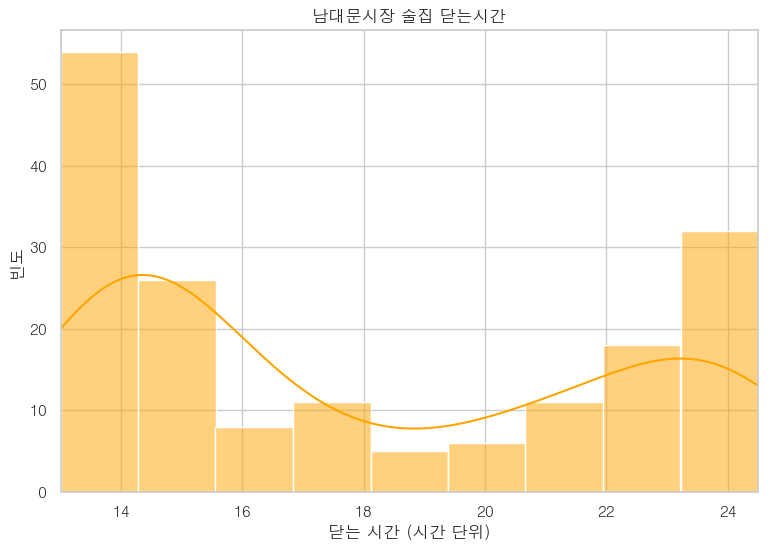

닫는 시간에 따른 빈도 및 퍼센트:
                   빈도수        퍼센트
(12.999, 14.278]   54  31.578947
(14.278, 15.556]   26  15.204678
(15.556, 16.833]    8   4.678363
(16.833, 18.111]   11   6.432749
(18.111, 19.389]    5   2.923977
(19.389, 20.667]    6   3.508772
(20.667, 21.944]   11   6.432749
(21.944, 23.222]   18  10.526316
(23.222, 24.5]     32  18.713450


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 7. 시각화 (KDE + 히스토그램, x축을 데이터에 맞게 자동 조정)
plt.figure(figsize=(9, 6))

# 히스토그램의 bins 수를 데이터 분포에 맞게 자동 설정 (빈 공간을 줄이기 위해)
bins = np.histogram_bin_edges(al['닫는시간_10진수'].dropna(), bins='auto')

sns.histplot(al['닫는시간_10진수'], bins=bins, kde=True, color='orange')
plt.xlim(al['닫는시간_10진수'].min(), al['닫는시간_10진수'].max())  # 데이터 범위로 자동 설정
plt.title('남대문시장 술집 닫는시간')
plt.xlabel('닫는 시간 (시간 단위)')
plt.ylabel('빈도')
plt.grid(True)
plt.show()

# 8. 닫는 시간에 따른 빈도와 퍼센트 계산
al_cleaned = al.dropna(subset=['닫는시간_10진수'])
value_counts = al_cleaned['닫는시간_10진수'].value_counts(bins=bins, sort=False)
percentages = (value_counts / len(al_cleaned)) * 100

# 9. 빈도 및 퍼센트 표로 정리
percent_table = pd.DataFrame({
    '빈도수': value_counts,
    '퍼센트': percentages
})

# 빈도와 퍼센트 표 출력
print("닫는 시간에 따른 빈도 및 퍼센트:\n", percent_table)